## Mở đầu.
- Có rất nhiều dạng biểu đồ thống kê, mỗi một biểu đồ mang một mục đích khác nhau để thể hiện sự phân bố của dữ liệu (histogram, boxplot, barplot, pie-plot), cặp dữ liệu (scatter plot) hay hệ số tương quan của nhiều dữ liệu (heat-map). Tất cả các biểu đồ này góp vai trò không nhỏ khi tiến hành `EDA (Explotary Data Analysis)` khi nó cho ta một cái nhìn trực quan về xu hướng (trend), phân bố (scatter) cũng như tương quan (correlation) trong dữ liệu.
- Trong `Python`, ta có rất nhiều thư viện để thực hiện các biểu đồ này, như `pandas`, `matplotlib`, `seaborn` hay thậm chí là `ggplot`.
- Bài viết dưới đây, tác giả chỉ giới thiệu 2 trong số đó.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv(r'/kaggle/input/nhap-abc/HappinessReport20201.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


## 0. Summary-statistic.

In [2]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317e+00,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,1.336643e-15,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317e+00,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317e+00,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317e+00,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317e+00,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


## 1. Line-plot. Biểu đồ đường.
Đây là loại biểu đồ dùng trong phân tích chuỗi thời gian, nếu dữ liệu cho sẵn có `index` (chỉ số) được đánh bởi `time-stamp` nào đó. Tuy nhiên dữ liệu này `happinessReport` thì không có các chỉ số thời gian nên ta sẽ không quan tâm đến biểu đồ này.

Tuy nhiên, cũng đã đề cập đến biểu đồ này nên ta sẽ xét một ví dụ đơn giản như sau:
- Giả sử thời gian được đánh chỉ số từ ngày `01/06/2020` đến `22/10/2020` với quan sát giá trị là nhiệt độ `t (temp)`

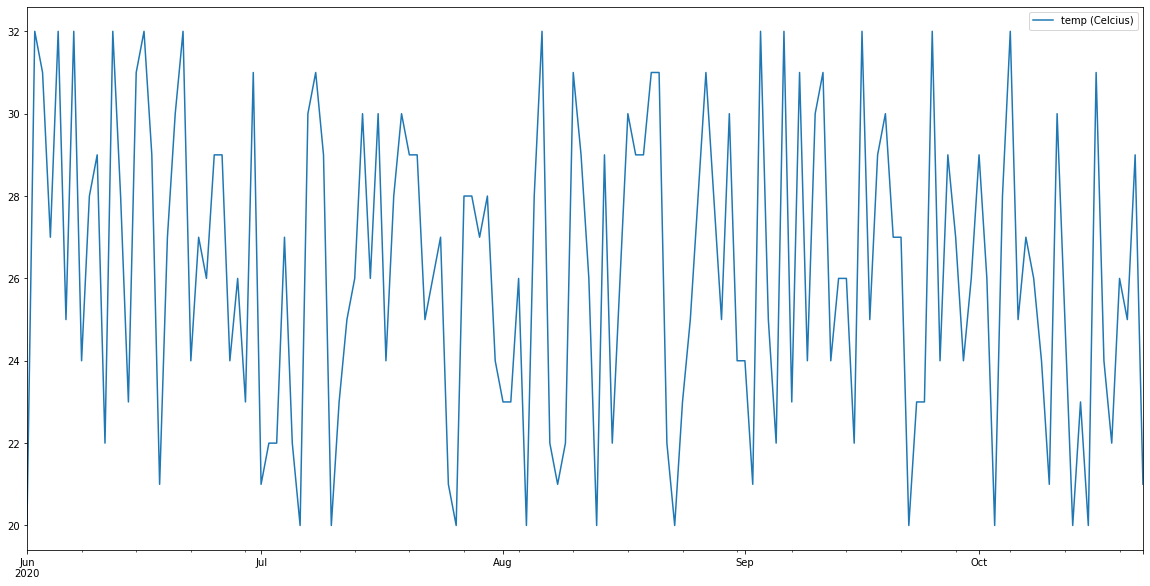

In [3]:
df_time = pd.DataFrame(data = np.random.randint(20, 33, 144),               ## gia su 144 gia tri nhiet do la cac so nguyen trong khoang [20, 33]
                       index = pd.date_range('06/01/2020', periods = 144),  ## phat sinh chỉ số thời gian, tính từ Jun 1, 2020
                       columns = ['temp (Celcius)'])                                  ## tạo tên cột là 'temp' (nhiet độ) 
df_time.plot(y = 'temp (Celcius)', kind = 'line', figsize = (20, 10))

## 2. Pie-plot. Biểu đồ tròn.
Loại biểu đồ này thể hiện mức độ phân tán của dữ liệu theo một nhóm category nào đó, ví dụ như vùng lãnh thổ, châu lục.

**Ví dụ nếu ta muốn vẽ biểu đồ tròn thể hiện tổng của `Logged GDP per capita` (lưu ý rằng `logged GDP per captia` là mức `GDP` đang được tính theo hàm `log` trên mỗi đầu người)  theo `Region` thì ta có thể thực hiện như sau**

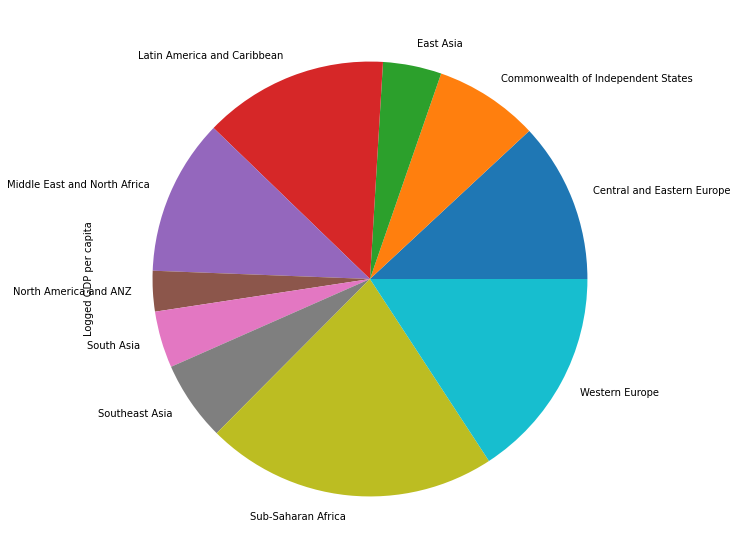

In [4]:
df.groupby('Regional indicator')['Logged GDP per capita'].sum().plot.pie(figsize = (10, 10))

Giải thích chi tiết (biểu đồ).
- Nhìn vào biểu đồ, ta thấy rằng tổng `GDP` ở các khu vực `sub-saharan of africa (Vùng hạ của sa mạc Sahara)` và `Western Europe` là các khu vực chiếm trọng số lớn hơn hẳn các vùng còn lại

- Tổng `GDP` của 3 vùng `North America and ANZ`, `Southeast Asia` và `South Asia` lại chiếm tỷ lệ rất ít.

- Tuy nhiên, tổng `GDP` này không thể phản ánh mức sống của các khu vực bởi một số khu vực có rất ít quốc gia như `North America and ANZ`, do đó khi dùng biểu đồ tròn cho `GDP` ta nên xét cả 2 hàm là `sum()` và `mean()`.

Giải thích chi tiết (code).

- Lệnh `df.groupby('Regional indicator')` sẽ tạo ra một class để phân nhóm dữ liệu theo vùng, ở đây là `Regional indicator`
- Phía sau `df.groupby('Regional indicator')` có một dấu ngoặc vuông `['Logged GDP per capita'].sum()` dùng để tính tổng các giá trị đã phân vùng ở cột `'Logged GDP per capita'`

In [5]:
df.groupby('Regional indicator')['Logged GDP per capita'].sum()

Regional indicator
Central and Eastern Europe            169.586955
Commonwealth of Independent States    110.486805
East Asia                              61.901367
Latin America and Caribbean           195.363496
Middle East and North Africa          165.132013
North America and ANZ                  42.839677
South Asia                             59.916435
Southeast Asia                         84.301627
Sub-Saharan Africa                    308.258175
Western Europe                        224.456443
Name: Logged GDP per capita, dtype: float64

Sau cùng, cú pháp `dataframe.plot.pie()` sẽ trả ra biểu đồ tròn dựa trên phần trăm ở mỗi vùng con (sub-region) trên toàn cục, ở đây là phần trăm của `tổng GDP từng continent` trên toàn cầu và thể hiện nó lên biểu đồ tròn.

**Một ví dụ khác nữa về biểu đồ tròn là dùng hàm tính trung bình `GDP` theo châu lục**

Regional indicator
Central and Eastern Europe             9.975703
Commonwealth of Independent States     9.207234
East Asia                             10.316895
Latin America and Caribbean            9.303024
Middle East and North Africa           9.713648
North America and ANZ                 10.709919
South Asia                             8.559491
Southeast Asia                         9.366847
Sub-Saharan Africa                     7.904056
Western Europe                        10.688402
Name: Logged GDP per capita, dtype: float64


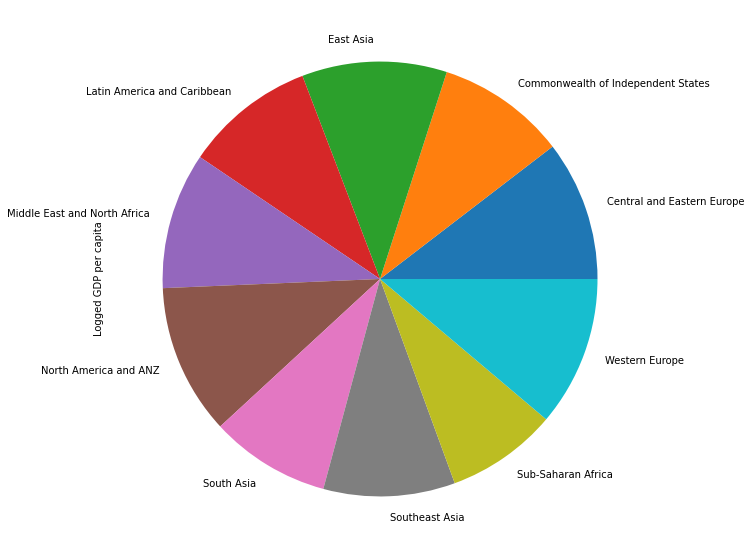

In [6]:
print(df.groupby('Regional indicator')['Logged GDP per capita'].mean())
df.groupby('Regional indicator')['Logged GDP per capita'].mean().plot.pie(figsize = (10, 10))

Lúc này, khu vực `North America and ANZ` lại có trung bình `GDP` cao nhất trong tất cả các khu vực; còn khu vực `Sub-Saharan of Africa` ban đầu có tổng `GDP` cao nhất nhưng khi tính về `trung bình GDP` thì đây là khu vực có mức thấp nhất.

## 3. Biểu đồ cột - histogram.
Biểu đồ cột thường được sử dụng để phân tích sự phân bố tập trung của dữ liệu đơn biến (`uni-variate`) và từ đó ước đoán mật độ của nó tập trung ở vùng nào cao nhất.

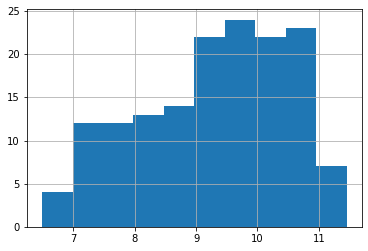

In [7]:
df['Logged GDP per capita'].hist(bins = 10)

- Trục tung đang là đếm số dữ liệu rơi vào một cột nào đó, ví dụ có 4 dữ liệu nằm trong khoảng `[3, 7]`, 12 dữ liệu trong khoảng `(7, 8]`, `...` và chỉ có 7 dữ liệu trên mức `10.8`. Điều này có nghĩa là trong 153 quốc gia đang được khảo sát thì chỉ có 4 quốc gia có mức thu nhập `Logged GDP per capita` dưới 7, ..., và 7 quốc gia có thu nhập rất cao (trên 10.8).
- Hầu hết dữ liệu phân bố tập trung ở khoảng `[7, 9.5]` phản ánh rằng có đến gần 2/3 trong tổng số các quốc gia được khảo sát có thu nhập dưới mức.

## 4. Box-plot. Biểu đồ hình hộp.
- Đây là biểu đồ thể hiện mức độ phân bố của dữ liệu đơn biến cùng với câu trả lời cho vấn đề `dữ liệu đó có "giá trị ngoại lai (outliers)" hay không?`

- Biểu đồ này được vẽ dựa trên 5 giá trị cơ bản là `min, Q1, Q2, Q3, max` trong đó `Q1, Q2, Q3` là các tứ phân vị của dữ liệu (lần lượt ứng với các mức `25%, 50%` và `75%` của dữ liệu) và `min, max` lần lượt là các giá trị nhỏ nhất và lớn nhất.

- Hình hộp (chữ nhật) hay `box` sẽ được giới hạn bởi 2 đường `Q1` và `Q3`; đường phân giữa hình hộp này chính là `trung vị hay Q2` trong các giá trị đã tính.

Sau đó, người ta tìm các `outliers` dựa vào đường thẳng `IQR`, một điểm dữ liệu được xem là `outlier` nếu nó nằm ngoài 2 rìa của boxplot. Về mặt Toán học, nó được xác định bởi công thức:

$$ \text{outliers} = \lbrace x : a \leq x \leq b \rbrace $$

trong đó,

$$ \begin{array}{ccl} a &=& \max \lbrace \min, Q1 - 1.5*\text{IQR} \rbrace \\ b &=& \min \lbrace \max, Q3 + 1.5*\text{IQR} \rbrace \end{array} $$

và

$$ \text{IQR} = Q3 - Q1 $$

count    153.000000
mean      64.445529
std        7.057848
min       45.200001
25%       58.961712
50%       66.305145
75%       69.289192
max       76.804581
Name: Healthy life expectancy, dtype: float64


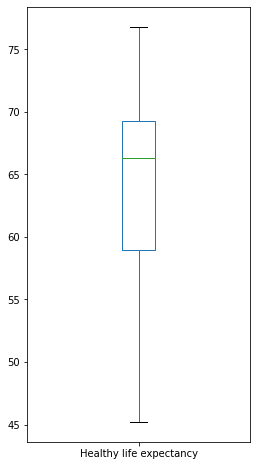

In [12]:
df['Healthy life expectancy'].plot(kind = 'box', figsize = (4, 8));
print(df['Healthy life expectancy'].describe())

- Nhìn vào kết quả trong cú pháp `dataframe.describe()`, ta chỉ cần quan tâm các giá trị sau

                        min       45.200001
                        25%       58.961712     (Q1)
                        50%       66.305145     (Q2)
                        75%       69.289192     (Q3)
                        max       76.804581

- Theo đó, hình hộp chữ nhật trong `boxplot` sẽ giới hạn bởi các đường `Q1 = 58.96` và `Q3 = 69.289` và đường phân đôi hình chữ nhật này chính là `Q2 (trung vị) = 66.305`.
- Khoảng giá trị `[Q1, Q3]` (trung tâm của boxplot) cho biết có đến `50%` dữ liệu được phân bố tập trung trong khoảng này.
- Từ các giá trị `Q1, Q2, Q3` cho thấy dữ liệu trong biến `Healthy life expectancy` đang lệch, cụ thể vì `Q2` gần `Q3` rất nhiều so với `Q1` nên dữ liệu có trung vị cao hơn so với trung bình của biến `Healthy life expectancy`. Ngoài ra, ta dễ dàng tính được

                            IQR = Q3 - Q1 = 10.327
từ đó tính được 
        
                            a = max(45.20, 58.961 - 1.5*IQR) = 45.2
                            b = min(76.804, 76.289 + 1.5*IQR) = 76.804
như vậy dữ liệu trong biến `Healthy life expectancy` không có `outliers`.                       
                           

## 5. Heat-map. Biểu đồ nhiệt.

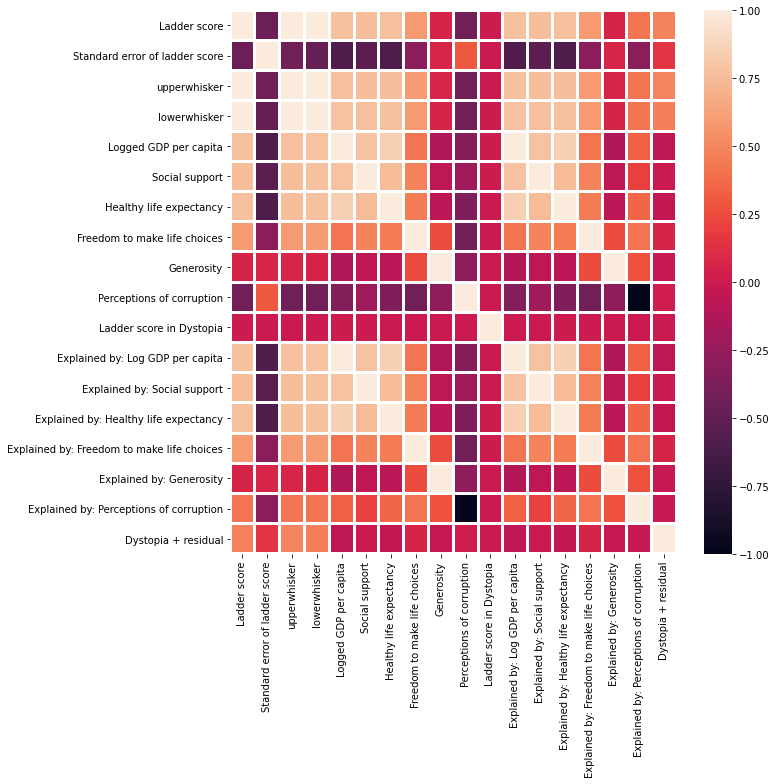

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.heatmap(df.corr(), linewidths = 2, ax = ax)

**Giải thích**
- Biểu đồ này dùng để trực quan các dữ liệu (cột) có tương quan với nhau **mạnh hay yếu**; là **tương quan thuận hay nghịch**
- Trong biểu đồ trên, dải màu sáng đại diện cho tương quan thuận, tức `correlation > 0`, cụ thể `corr(X, Y) > 0` giải thích việc khi `X` tăng sẽ kéo theo `Y` cũng tăng; `X` giảm thì `Y` giảm; ngược lại dải màu tối biểu thị cặp biến đó đang là tương quan nghịch, tức là `corr(X, Y) < 0` hay sự tăng lên của biến này dẫn đến sự giảm đi về giá trị của biến khác và ngược lại.
- Một cặp dữ liệu là **tương quan mạnh** nếu `correlation` của chúng gần bằng $1$ (tương quan **thuận**, ví dụ `upperwhisker` và `lowerwhisker`) hoặc gần $-1$ (tương quan **nghịch**)
- Một cặp dữ liệu sẽ được xem là không có liên hệ gì với nhau nếu `correlation` giữa chúng xấp xỉ `0`.
- Đường chéo chính của biểu đồ luôn trả ra giá trị `1` vì dữ liệu đó tất nhiên tương quan thuận với chính nó.

### References.
[link](https://www.investopedia.com/terms/h/heatmap.asp#:~:text=A%20heatmap%20is%20a%20graphical,statistical%20or%20data%2Ddriven%20information.)